In [38]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import bandstructure as bs
from pymatgen.electronic_structure import plotter
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar

In [39]:
with MPRester("36eyCyWre0p7eCRDZiEH2u5AWop4BHPb") as mp:
    Li2CuSb  = mp.get_bandstructure_by_material_id("mp-15988")
    print("La structure de bandes électroniques du matériau a bien été téléchargée :-)")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

La structure de bandes électroniques du matériau a bien été téléchargée :-)


# Sous-question 1 : Bande Interdite

In [40]:
Gap = Li2CuSb.get_band_gap()["energy"]

print("La bande interdite est de largeur :", Gap,"eV.\n")
print("On peut voir ci-dessous la largeur de cette bande interdite qui est représentée par le segment rouge horizontal.")

La bande interdite est de largeur : 0.4535 eV.

On peut voir ci-dessous la largeur de cette bande interdite qui est représentée par le segment rouge horizontal.


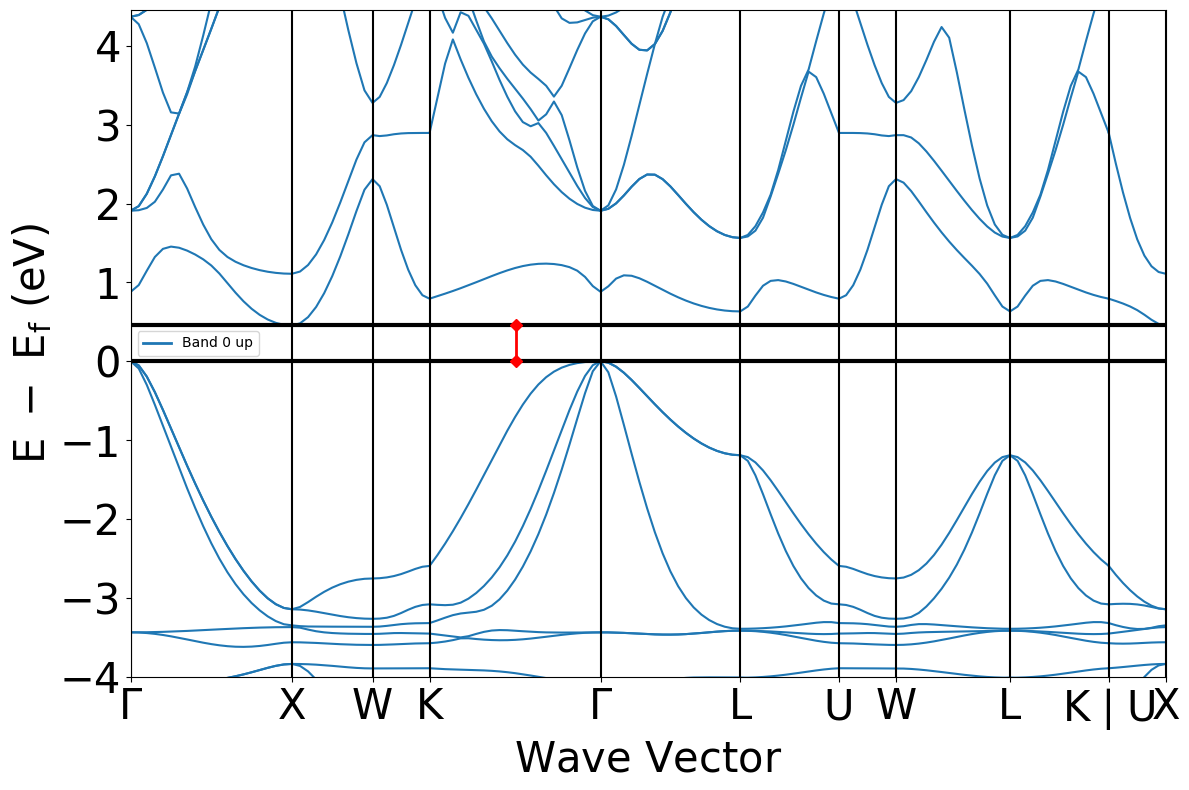

In [41]:
plotter.BSPlotter(Li2CuSb).get_plot()

x1, y1 = [-0.1, 10], [0, 0] #droite horizontale inférieure
x2, y2 = [-0.1, 10], [Gap, Gap] #droite horizontale supérieure
x3, y3 = [2.37,2.37], [0,Gap] #segment vertical

plt.plot(x1, y1, x2, y2, linewidth = 3 , color = 'k') #représentation des 2 droites horizontales en noir
plt.plot(x3, y3, linewidth = 2, color = 'r', marker = 'D') #représentation du segment vertical en rouge

plt.show()

# Sous-question 2 : Dispersion

Pour calculer la valeur de la dispersion, on regarde la dérivée de l'énergie E par rapport à k. 

Pour ce faire on calcule delta(E)/delta(k) de proche en proche entre les différentes frontières de chemin pour récupèrer les minimums et maximum. Ces minimums et maximums nous donnent alors les lieux sur la bande où la dispersion est la plus petite (cas du minimum) et où la dispersion est la plus grande (cas du maximum).

In [42]:
data = plotter.BSPlotter(Li2CuSb).bs_plot_data()

dEdk_valence = []
dEdk_conduction = []
for i in range(len(data['distances'])) :#nombre de frontières de chemin
    
    dk = data['distances'][i][0]-data['distances'][i][-1] #différence de 'k' entre chaque frontière
    dE_valence = data["energy"]["1"][i][9][0]-data["energy"]["1"][i][9][-1] #différence des énergies de valence entre chaque frontière
    dE_conduction = data["energy"]["1"][i][10][0]-data["energy"]["1"][i][10][-1] #différence des énergies de conduction entre chaque frontière
    
    dEdk_valence.append(abs(dE_valence/dk)) #liste des dE_valence/dk entre chaque frontière
    dEdk_conduction.append(abs(dE_conduction/dk)) #liste des dE_conduction/dk entre chaque frontière

#Pour la bande de valence:
print("Bande de valence :")
print("Dispersion maximale: de k =", data['distances'][dEdk_valence.index(max(dEdk_valence))][0],
     "[1/A] à k=",data['distances'][dEdk_valence.index(max(dEdk_valence))][-1],"[1/A]")
print("Dispersion minimale: de k =",data['distances'][dEdk_valence.index(min(dEdk_valence))][0],
     "[1/A] à",     data['distances'][dEdk_valence.index(min(dEdk_valence))][-1],"[1/A] \n")

#Pour la bande de conduction:
print("Bande de conduction :")
print("Dispersion maximale: de k =",data['distances'][dEdk_conduction.index(max(dEdk_conduction))][0],
     "[1/A] à",data['distances'][dEdk_conduction.index(max(dEdk_conduction))][-1],"[1/A]")
print("Dispersion minimale: de k =",data['distances'][dEdk_conduction.index(min(dEdk_conduction))][0],
     "[1/A] à",data['distances'][dEdk_conduction.index(min(dEdk_conduction))][-1],"[1/A]")

Bande de valence :
Dispersion maximale: de k = 5.409783899808254 [1/A] à k= 6.017272908668739 [1/A]
Dispersion minimale: de k = 2.890973867238661 [1/A] à 3.7500930625617466 [1/A] 

Bande de conduction :
Dispersion maximale: de k = 6.017272908668739 [1/A] à 6.3680068514640755 [1/A]
Dispersion minimale: de k = 1.4880380960572734 [1/A] à 1.8387720388526125 [1/A]


# Graphiquement :

Les flèches ci-dessous représentent les maximums et les minimus de dispersions sur la graphe de la structure électronique du Li2CuSb.

Comme vous le savez, la bande supérieur est la bande de conduction et la bande inférieure est celle de valence.
Le flèche rouge représentent les maximums tandis que les flèches vertes représentent les minimums de dispersion.

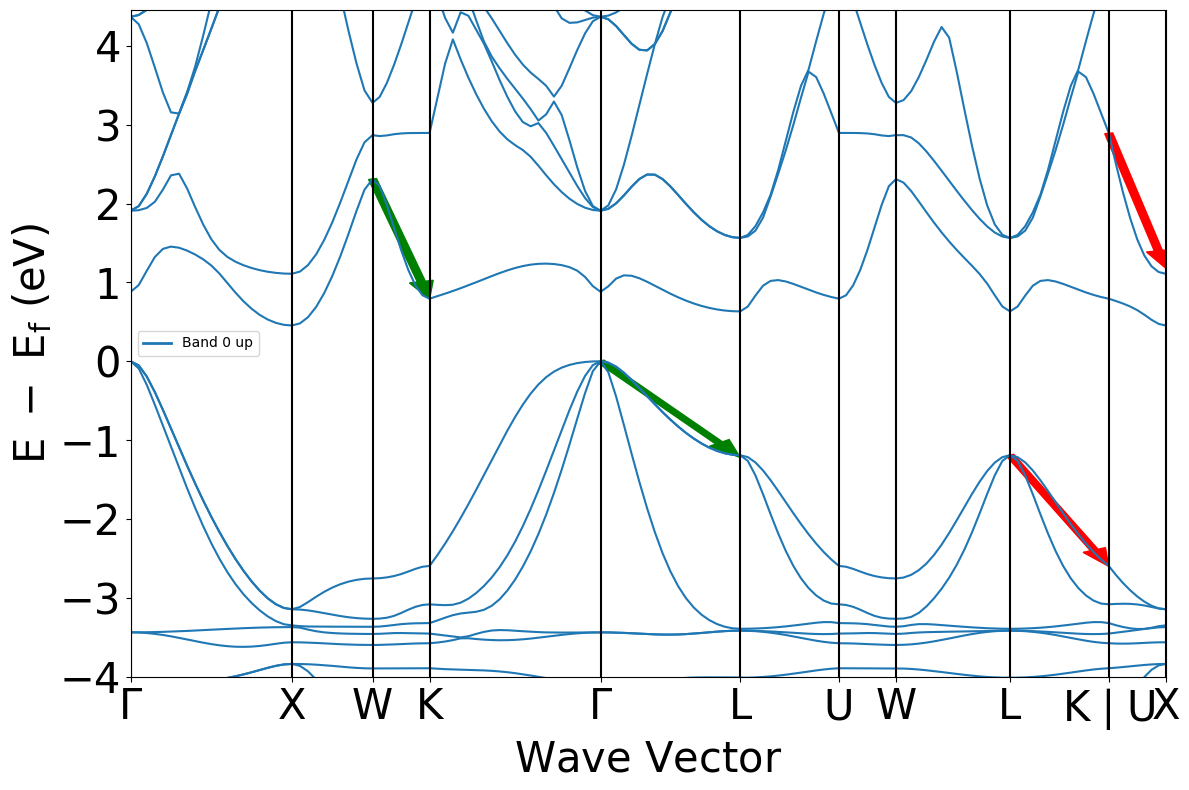

In [43]:
plotter.BSPlotter(Li2CuSb).get_plot()

#Première flèche:
plt.arrow(5.409783899808254,-1.19,0.607489008860485,-1.41, width = 0.05, length_includes_head = True, color ='r')

#Seconde flèche:
plt.arrow(2.890973867238661,0,0.8591191953230854, -1.22, width = 0.05, length_includes_head = True, color ='g')

#Troisième flèche:
plt.arrow(6.017272908668739,2.89,0.3507339427953369, -1.71, width = 0.05, length_includes_head = True, color ='r')

#Quatrième flèche:
plt.arrow(1.4880380960572734,2.31,0.3507339427953391, -1.52, width = 0.05, length_includes_head = True, color ='g')

plt.show()

# Sous-question 3 : Masse effective

Pour trouver la masse effective, il suffit de résoudre l'équation suivante :
$$m_* = \frac{\hbar^2}{\frac{\mathrm d^2}{\mathrm d k^2} \left( E \right)}$$

On fait l'hypothèse que la dispersion est parabolique. Cette hypothèse nous permet de trouver la dérivée seconde de l'énergie.
En tenant compte de cette hyptohèse, on peut ensuite réaliser une régression polynomiale d'ordre 2. On utilise les valeurs de E et de k au sommet de la dernière bande de valence (ou de manière équivalente, ces mêmes valeurs à la base de la première bande de conduction) et les valeurs de E et k aux 2 points les plus proches trouvés.

On fait bien attention pour la dérivée seconde. Il faut prendre 2 fois le premier coef du polynome car on une dérivée seconde.

Il faut aussi bien faire attention aux unités, il est nécessaire de faire une conversion des unités.

In [44]:
k = [0.0]
E_conduction= [data["energy"]['1'][0][10][0]]
E_valence = [0.0]

for i in range(len(data['distances'])-1) :#nombre de frontières de chemin -1
    k.append(data['distances'][i][0])
    E_valence.append(data["energy"]['1'][i+1][9][0]) 
    E_conduction.append(data["energy"]['1'][i+1][10][0])

#print(E_valence)
#print(E_conduction)

def MasseEffective(k, E):
    poly_fit = np.polyfit(k,E, 2)
    coef = pow(hbar,2)/(2*poly_fit[0]*(1.602176565e-19)*10e-20) #Conversion dans les bonnes unités  
    return coef


Ec=[data["energy"]['1'][1][10][-2],E_conduction[2],data["energy"]['1'][2][10][1]]
kc=[data['distances'][1][-2],data['distances'][2][0],data['distances'][2][1]]

Ev=[E_valence[0],data["energy"]['1'][0][9][1],data["energy"]['1'][0][9][2]]
kv=[data['distances'][0][0],data['distances'][0][1],data['distances'][0][2]] #Comme le maximum se situe à k=0, on prend ce point et les 2 suivants à droite.



print("\nLa masse effective au sommet de la dernière bande de valence est : m* =",MasseEffective(kv,Ev),"[kg].")
print("\nLa masse effective à la base de la dernière bande de conduction est : m* =",MasseEffective(kc,Ec),"[kg].")


La masse effective au sommet de la dernière bande de valence est : m* = 4.974549241484807e-34 [kg].

La masse effective à la base de la dernière bande de conduction est : m* = 5.7676725149038975e-31 [kg].
